# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

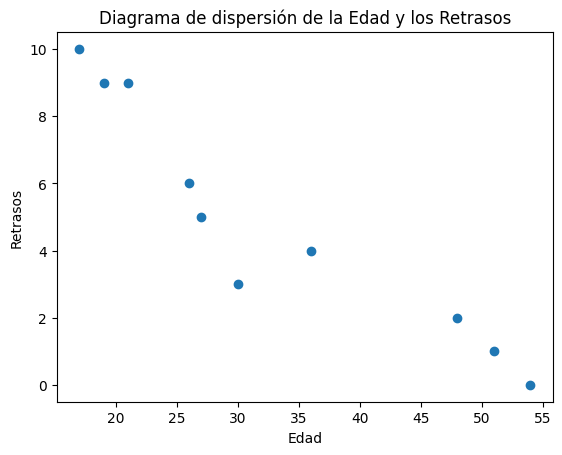

In [18]:
x = student_data['Edad']
y = student_data['Retrasos']

plt.scatter(x, y)
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.title('Diagrama de dispersión de la Edad y los Retrasos')
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Se observa una clara tendencia lineal. A medida que disminuye la edad aumenta el número de retrasos.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

#### COVARIANZA


In [10]:
covarianza = x.cov(y)
print(f'La covarianza entre Edad y Retrasos es: {covarianza}')

La covarianza entre Edad y Retrasos es: -45.56666666666666


In [13]:
mean_x = np.mean(x)
mean_y = np.mean(y)

# Número de observaciones
n = len(x)

# Cálculo de la covarianza
covarianza_manual = np.sum((x - mean_x) * (y - mean_y)) / (n - 1)
print(f'La covarianza manual entre Edad y Retrasos es: {covarianza_manual}')

La covarianza manual entre Edad y Retrasos es: -45.56666666666667


#### La covarianza nos dice si hay una relación lineal entre dos variables y cómo se comportan las dos variables con respecto a esa relación. Observamos una fuerte relación negativa, a medida que aumenta la edad, disminuye el número de retrasos.

#### CORRELACIÓN

In [15]:
correlacion = x.corr(y)
print(f'La correlación entre Edad y Retrasos es: {correlacion}')

La correlación entre Edad y Retrasos es: -0.9391626886887122


#### La correlación nos indica la fuerza y la dirección de una relación lineal entre dos variables. A diferencia de la covarianza, la correlación está normalizada, lo que significa que siempre toma valores entre -1 y 1, independientemente de las unidades de las variables. Siendo nuestra correlación -0.93, tenemos una muy fuerte correlación.

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [29]:
from sklearn.model_selection import train_test_split
from scipy.optimize import fmin
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

X = np.array(x, dtype=np.float64).reshape(-1,1)
y = np.array(y, dtype=np.float64)

#1. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8, 1) (2, 1) (8,) (2,)


In [30]:
#2.Ajustamos el modelo

# Función de error cuadrático
sse = lambda a, X, y: np.sum((a[0] + a[1]*X.flatten() - y) ** 2)

# Encontrar los coeficientes óptimos
a0, a1 = fmin(sse, [0, 1], args=(X_train, y_train))
print(f'Coeficientes: a0 = {a0}, a1 = {a1}')

Optimization terminated successfully.
         Current function value: 13.229461
         Iterations: 98
         Function evaluations: 178
Coeficientes: a0 = 12.994880501734633, a1 = -0.24669035163583822


In [31]:
#3. Predicciones en el conjunto de prueba
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

12.994831484871323 [-0.24668892]


Grafica tu modelo de regresión en tu diagrama de dispersión.

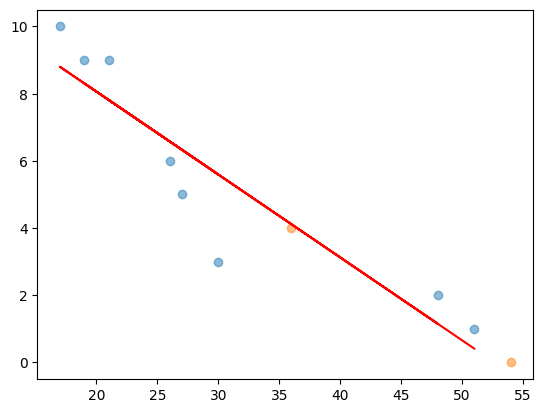

In [32]:
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")


Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

Podemos evaluar el ajuste del modelo calculando el error cuadrático medio (MSE) y el coeficiente de determinación (r^2) del modelo.

In [33]:
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Score:
0.8422717074666652 0.98505994646693
MSE:
1.6536825670291813 0.059760214132280054


El coeficiente de determinación mide la proporción de la variación en la variable dependiente que es explicada por el modelo. Su valor de 0.95 indica que el modelo predice muy bien los datos.

El MSE es una medida de la calidad de las predicciones del modelo. Calcula el promedio de los cuadrados de las diferencias entre los valores predichos y los valores observados. El MSE de los datos de prueba es muy bajo, 0.05, por lo que las predicciones del modelo están extremadamente cerca de los valores observados en el conjunto de prueba. 

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [40]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [44]:
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
resultado = 'CO2 Emission Grams/Mile'

X = vehicles[variables]
y = vehicles[resultado]

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [64]:
seed = 1

In [65]:
vehicles_selected = vehicles[variables + [resultado]]

# Calcular las correlaciones
correlation_matrix = vehicles_selected.corr()

# Mostrar las correlaciones de cada variable con la variable de resultado
correlation_with_result = correlation_matrix[resultado].drop(resultado)  # Excluir la correlación de la variable de resultado consigo misma
print("Correlaciones con 'Emisiones de CO2 Gramos/Milla':")
print(correlation_with_result)

Correlaciones con 'Emisiones de CO2 Gramos/Milla':
Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64


Según las correlaciones, parece que el Número de Barriles de Combustible/Año cunto con el Costo del Combustible por Año serían las dos variables que pueden explicar más las emisiones de CO2. 

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [66]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

print('Tamaños de entrenamiento y prueba de X: {} {}'.format(X_train.shape, X_test.shape))
print('Tamaños de entrenamiento y prueba de y: {} {}'.format(y_train.shape, y_test.shape))

Tamaños de entrenamiento y prueba de X: (7190, 5) (28762, 5)
Tamaños de entrenamiento y prueba de y: (7190,) (28762,)


In [69]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ajuste de un modelo de regresión lineal múltiple
lr = LinearRegression()  # Crear el estimador de Regresión Lineal
lr.fit(X_train, y_train)  # Realizar el ajuste

# Coeficientes de regresión
coefs_lr = pd.Series(np.abs(lr.coef_), index=variables).sort_values()

# Predicción
y_test_pred = lr.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_test_pred)
r2score_train = lr.score(X_train, y_train)
r2score_test = lr.score(X_test, y_test)

# Mostrar resultados
# Intercepto y coeficientes
print('\nIntercepto y coeficientes:\n{} {}'.format(lr.intercept_, lr.coef_))
# Error cuadrático medio
print('\nError Cuadrático Medio (ECM): {}'.format(mse))
# Coeficiente de determinación: 1 es una predicción perfecta
print('Puntaje R^2 (entrenamiento): {}'.format(r2score_train))
print('Puntaje R^2 (prueba): {}'.format(r2score_test))


Intercepto y coeficientes:
753.091221013482 [-0.31293579  2.01293371 19.29955924 -3.01167218  0.03008081]

Error Cuadrático Medio (ECM): 275.45958494141973
Puntaje R^2 (entrenamiento): 0.9823051368264099
Puntaje R^2 (prueba): 0.9804894707368844


In [70]:
coefs_lr

Fuel Cost/Year        0.030081
Year                  0.312936
Cylinders             2.012934
Combined MPG          3.011672
Fuel Barrels/Year    19.299559
dtype: float64

<Axes: title={'center': 'Coeficientes del Modelo (Valor Absoluto)'}>

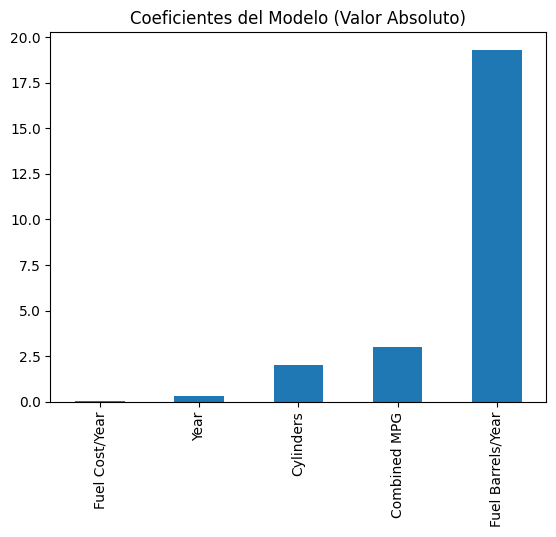

In [71]:
# Graficar el valor absoluto de los coeficientes del modelo
coefs_lr.plot(kind='bar', title='Coeficientes del Modelo (Valor Absoluto)')

Podemos ver que todos los coeficientes obtenidos son diferentes de cero, lo que significa que no se descarta ninguna variable. A continuación, intentaremos construir un nuevo modelo para predecir el precio utilizando los factores más importantes y descartando los no informativos. Para hacer esto, podemos crear un regresor LASSO, forzando coeficientes a cero.

#### Modelos de Regularización

RIDGE

In [74]:
## Regresión Ridge
ridge = linear_model.Ridge(alpha=1) # Crear un regresor Ridge
ridge.fit(X_train, y_train) # Realizar el ajuste

# Coeficientes de regresión
coefs_ridge = pd.Series(np.abs(ridge.coef_), variables).sort_values()

# Predicción
y_test_pred_ridge = ridge.predict(X_test)

# Evaluación
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2score_ridge_train = ridge.score(X_train, y_train)
r2score_ridge_test = ridge.score(X_test, y_test)

# Mostrar resultados
# Intercepto y coeficientes
print('\nIntercepto y coeficientes:\n{} {}'.format(ridge.intercept_, ridge.coef_))
# Error cuadrático medio
print('\nError Cuadrático Medio (MSE): {}'.format(mse_ridge))
# Coeficiente de determinación: 1 es una predicción perfecta
print('Puntaje R^2 (entrenamiento): {}'.format(r2score_ridge_train))
print('Puntaje R^2 (prueba): {}'.format(r2score_ridge_test))


Intercepto y coeficientes:
753.2133544218473 [-0.31298847  2.01298266 19.29832457 -3.01204803  0.03008727]

Error Cuadrático Medio (MSE): 275.45785958154346
Puntaje R^2 (entrenamiento): 0.9823051366082735
Puntaje R^2 (prueba): 0.9804895929424136


In [76]:
coefs_ridge

Fuel Cost/Year        0.030087
Year                  0.312988
Cylinders             2.012983
Combined MPG          3.012048
Fuel Barrels/Year    19.298325
dtype: float64

<Axes: title={'center': 'Coeficientes Ridge (Valor Absoluto)'}>

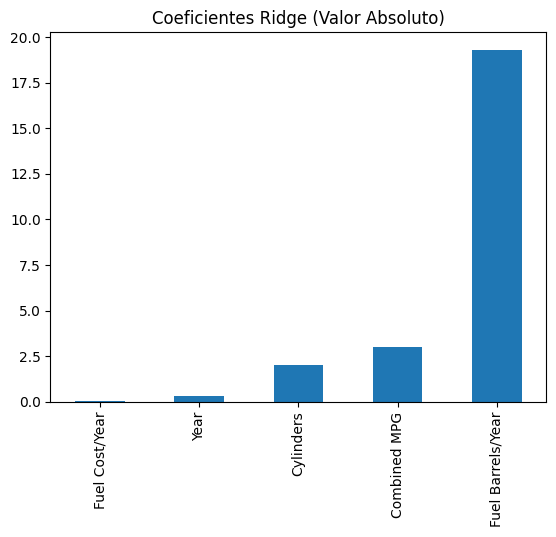

In [75]:
# Graficar el valor absoluto de los coeficientes del modelo Ridge
coefs_ridge.plot(kind='bar', title='Coeficientes Ridge (Valor Absoluto)')

LASSO

In [79]:
## Regresión Lasso
lasso = linear_model.Lasso(alpha=1)
lasso.fit(X_train, y_train)

# Coeficientes de regresión
coefs_lasso = pd.Series(np.abs(lasso.coef_),variables ).sort_values()

# Predicción
y_test_pred_lasso = lasso.predict(X_test)

# Evaluación
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2score_lasso_train = lasso.score(X_train, y_train)
r2score_lasso_test = lasso.score(X_test, y_test)

# Mostrar resultados
# Error cuadrático medio
print('Error Cuadrático Medio (MSE): {}'.format(mse_lasso))
# Coeficiente de determinación: 1 es una predicción perfecta
print('Puntaje R^2 (entrenamiento): {}'.format(r2score_lasso_train))
print('Puntaje R^2 (prueba): {}'.format(r2score_lasso_test))

Error Cuadrático Medio (MSE): 275.66496366229535
Puntaje R^2 (entrenamiento): 0.9822302612243881
Puntaje R^2 (prueba): 0.9804749239657328


In [81]:
coefs_lasso

Fuel Cost/Year        0.034278
Year                  0.294990
Cylinders             1.194942
Combined MPG          2.970405
Fuel Barrels/Year    19.100502
dtype: float64

<Axes: title={'center': 'Coeficientes Lasso (Valor Absoluto)'}>

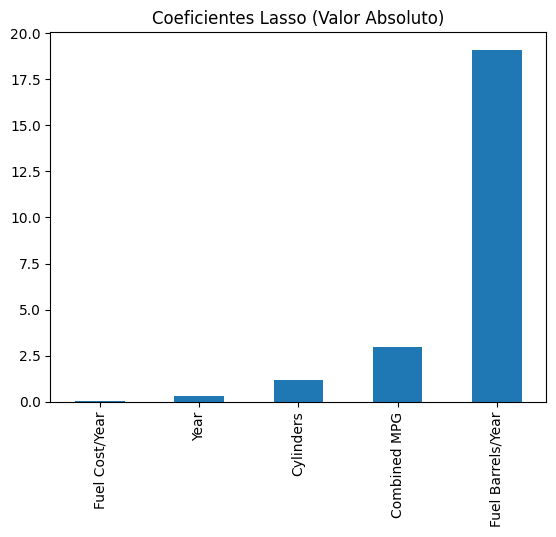

In [80]:
# Graficar el valor absoluto de los coeficientes del modelo Lasso
coefs_lasso.plot(kind='bar', title='Coeficientes Lasso (Valor Absoluto)')

Comparamos resultados después de hacer la regularización de Ridge y Lasso

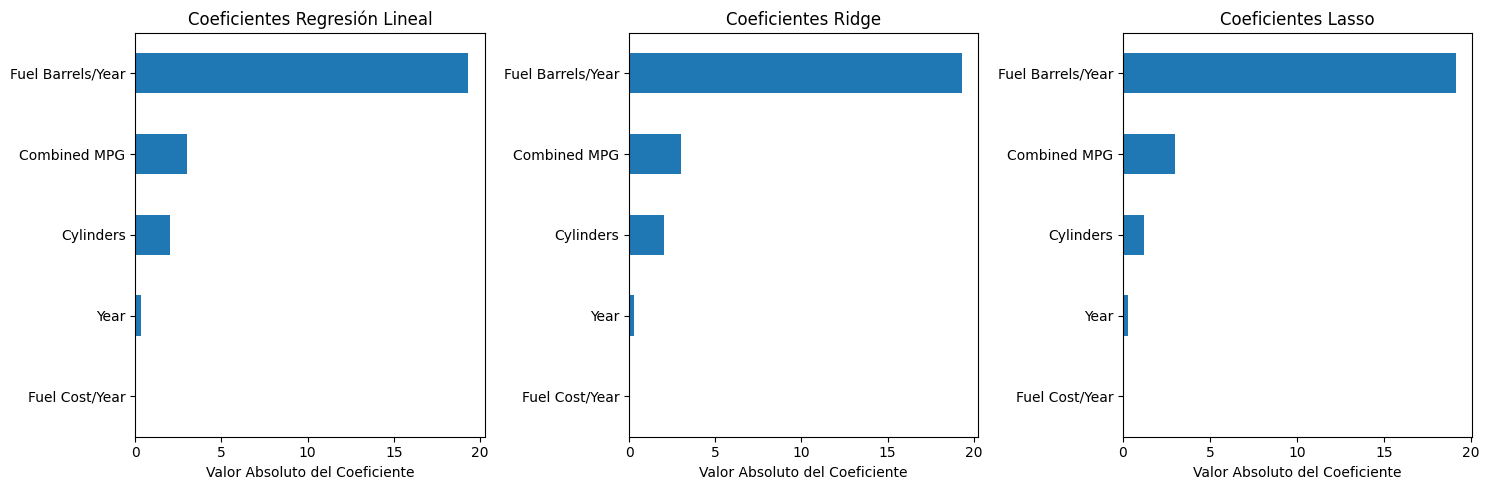

In [82]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

coefs_lr.plot(kind="barh", title='Coeficientes Regresión Lineal', ax=ax1)
coefs_ridge.plot(kind="barh", title='Coeficientes Ridge', ax=ax2)
coefs_lasso.plot(kind="barh", title='Coeficientes Lasso', ax=ax3)

ax1.set_xlabel('Valor Absoluto del Coeficiente')
ax2.set_xlabel('Valor Absoluto del Coeficiente')
ax3.set_xlabel('Valor Absoluto del Coeficiente')

plt.tight_layout()
plt.show()

In [83]:
print('Variables no importantes: {}'.format(coefs_lasso.index[coefs_lasso == 0].values))
print('Variable más importante: {}'.format(coefs_lasso.index[-1]))

Variables no importantes: []
Variable más importante: Fuel Barrels/Year


In [84]:
scores = [[r2score_train, r2score_test],
         [r2score_ridge_train, r2score_ridge_test],
         [r2score_lasso_train, r2score_lasso_test]]
df_scores = pd.DataFrame(scores, columns=["Entrenamiento", "Prueba"], index=["Sin regularización", "Ridge", "Lasso"])
#df_scores.sort_values(by="test_score", ascending=False, inplace=True)
df_scores

,Entrenamiento,Prueba
Sin regularización,0.982305,0.980489
Ridge,0.982305,0.980490
Lasso,0.982230,0.980475


#### NORMALIZACIÓN DE DATOS

In [85]:
from sklearn.preprocessing import StandardScaler

In [87]:
# Ajustar el StandardScaler y transformar los datos de entrenamiento
scalerX = StandardScaler().fit(X_train)
X_train_norm = scalerX.transform(X_train)
X_test_norm = scalerX.transform(X_test)

In [92]:
# Entrenar modelos
lr_norm = linear_model.LinearRegression()
ridge_norm = linear_model.Ridge(alpha=.3)
lasso_norm = linear_model.Lasso(alpha=.3)

lr_norm.fit(X_train_norm, y_train)
ridge_norm.fit(X_train_norm, y_train)
lasso_norm.fit(X_train_norm, y_train)

# Coeficientes de regresión
coefs_lr_norm = pd.Series(np.abs(lr_norm.coef_), variables).sort_values()
coefs_ridge_norm = pd.Series(np.abs(ridge_norm.coef_), variables).sort_values()
coefs_lasso_norm = pd.Series(np.abs(lasso_norm.coef_), variables).sort_values()

<Axes: title={'center': 'Coeficientes Lasso Normalizados'}>

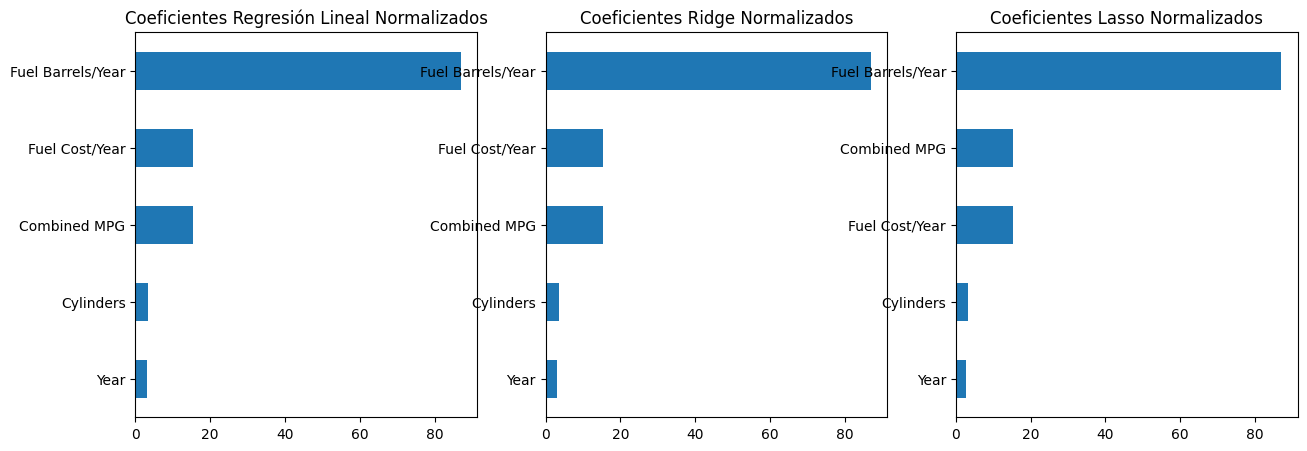

In [94]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

coefs_lr_norm.plot(kind="barh", title='Coeficientes Regresión Lineal Normalizados', ax=ax1)
coefs_ridge_norm.plot(kind="barh", title='Coeficientes Ridge Normalizados', ax=ax2)
coefs_lasso_norm.plot(kind="barh", title='Coeficientes Lasso Normalizados', ax=ax3)

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [95]:
# Scores
print('lr: {}'.format(lr.score(X_test, y_test)))
print('ridge: {}'.format(ridge.score(X_test, y_test)))
print('lasso: {}'.format(lasso.score(X_test, y_test)))
print('lr_norm: {}'.format(lr_norm.score(X_test_norm, y_test)))
print('ridge_norm: {}'.format(ridge_norm.score(X_test_norm, y_test)))
print('lasso_norm: {}'.format(lasso_norm.score(X_test_norm, y_test)))

lr: 0.9804894707368844
ridge: 0.9804895929424136
lasso: 0.9804749239657328
lr_norm: 0.9804894707368844
ridge_norm: 0.9804900408255895
lasso_norm: 0.9804765948674509


Mejor regresión: Regresión Ridge con datos normalizados (ridge_norm):
El modelo de regresión Ridge explica alrededor del 98.05% de la variabilidad de la variable dependiente utilizando los datos de prueba normalizados. El resultado puede haber mejorado debido a la regularización que ayuda a manejar la multicolinealidad.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [119]:
data = {
    'Invitados': [1, 3, 4, 6, 8, 9, 11, 14],
    'Asistidos': [1, 2, 4, 4, 5, 7, 8, 13]
}

fiesta = pd.DataFrame(data)

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

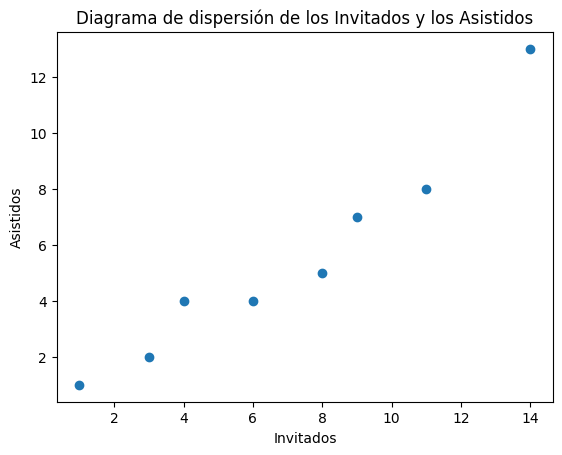

In [127]:
X = fiesta['Invitados']
y = fiesta['Asistidos']

X = np.array(X, dtype=np.float64).reshape(-1,1)
y = np.array(y, dtype=np.float64)

plt.scatter(x, y)
plt.xlabel('Invitados')
plt.ylabel('Asistidos')
plt.title('Diagrama de dispersión de los Invitados y los Asistidos')
plt.show()


¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

In [128]:
#1. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Instanciar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Obtener los coeficientes del modelo
print(f'Coeficiente de la pendiente (b1): {model.coef_[0]}')
print(f'Intercepto (b0): {model.intercept_}')

(6, 1) (2, 1) (6,) (2,)
Coeficiente de la pendiente (b1): 0.8484848484848485
Intercepto (b0): -0.43939393939393945


In [129]:
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Score:
-2.2000839784193436 -485.3581065747456
MSE:
31.378601232834118 121.5895266436864


Visualmente podríamos pensar que existe una relación positiva entre el número de invitados y de asistentes.

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [130]:
data_outlier = {
    'Invitados': [1, 3, 4, 6, 8, 9, 11],
    'Asistidos': [1, 2, 4, 4, 5, 7, 8]
}

fiesta2 = pd.DataFrame(data_outlier)

In [131]:
X = fiesta2['Invitados']
y = fiesta2['Asistidos']

X = np.array(X, dtype=np.float64).reshape(-1,1)
y = np.array(y, dtype=np.float64)

In [132]:
#1. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5, 1) (2, 1) (5,) (2,)


In [133]:
# Instanciar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Obtener los coeficientes del modelo
print(f'Coeficiente de la pendiente (b1): {model.coef_[0]}')
print(f'Intercepto (b0): {model.intercept_}')

Coeficiente de la pendiente (b1): 0.6842105263157894
Intercepto (b0): 0.32330827067669254


¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

In [134]:
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Score:
-10.625624811525416 -14.715228052602356
MSE:
69.75374886915249 35.3592631183553


*tu explicación aquí*